# Bank Loan Approval Prediction using Artificial Neaural Network

## Importing the required libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,roc_auc_score, auc, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

## Loading the dataset

In [5]:
bank_df = pd.read_csv("Downloads/UniversalBank.csv")

## Exploratory Data Analysis

In [7]:
bank_df.shape

(5000, 14)

In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
bank_df['Experience'] = bank_df['Experience'].apply(lambda x: 0 if x < 0 else x)


### Replacing the negative values in the Experience column with 0, as it is not possible to have experience in negative

## Checking for missing values

In [12]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Data Visualization

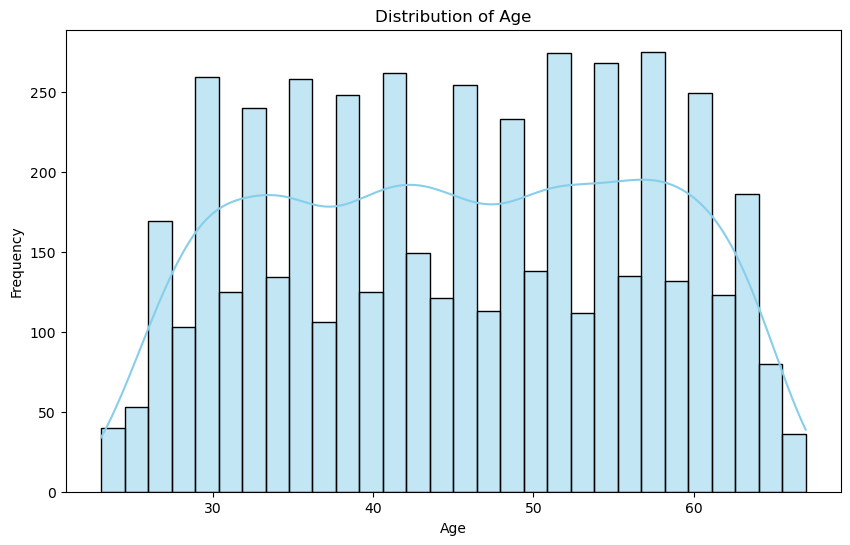

In [14]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bank_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


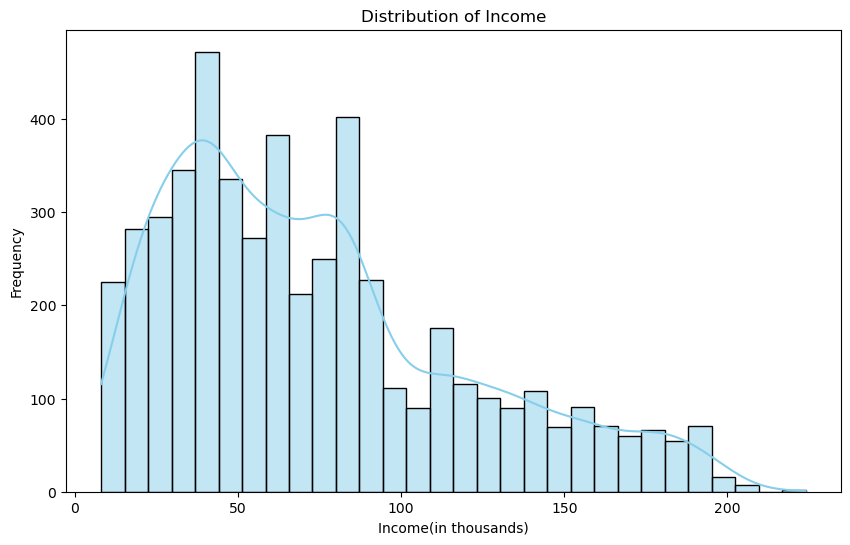

In [15]:
# Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bank_df['Income'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Income')
plt.xlabel('Income(in thousands)')
plt.ylabel('Frequency')
plt.show()

## creating a new label called education label only for visualization purpose

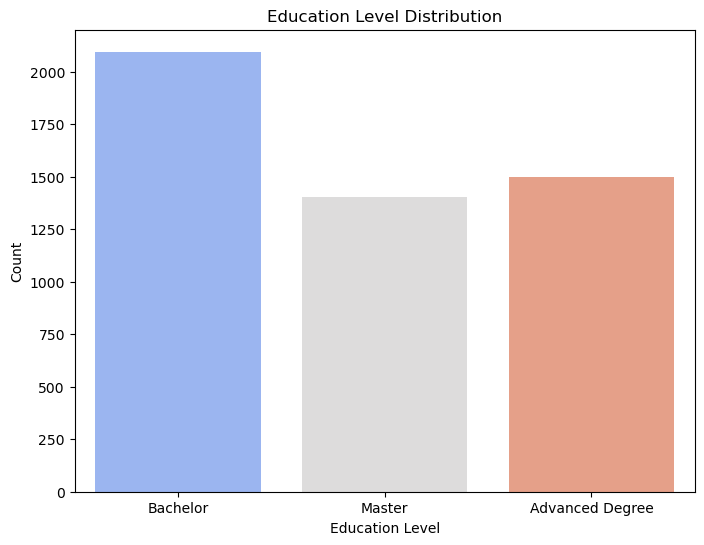

In [17]:
# Map numeric values to meaningful labels
education_labels = {1: 'Bachelor', 2: 'Master', 3: 'Advanced Degree'}
bank_df['Education Label'] = bank_df['Education'].map(education_labels)

# Education Level Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Education Label', data=bank_df, palette='coolwarm', order=['Bachelor', 'Master', 'Advanced Degree'])
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

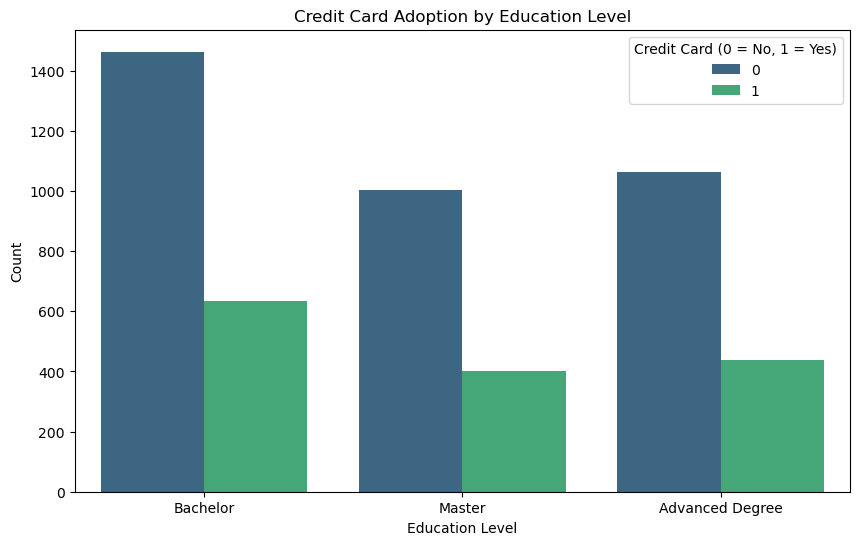

In [18]:
# Credit Card Adoption by Education Level
plt.figure(figsize=(10, 6))
sns.countplot(data=bank_df, x='Education Label', hue='CreditCard', palette='viridis')
plt.title('Credit Card Adoption by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Credit Card (0 = No, 1 = Yes)')
plt.show()

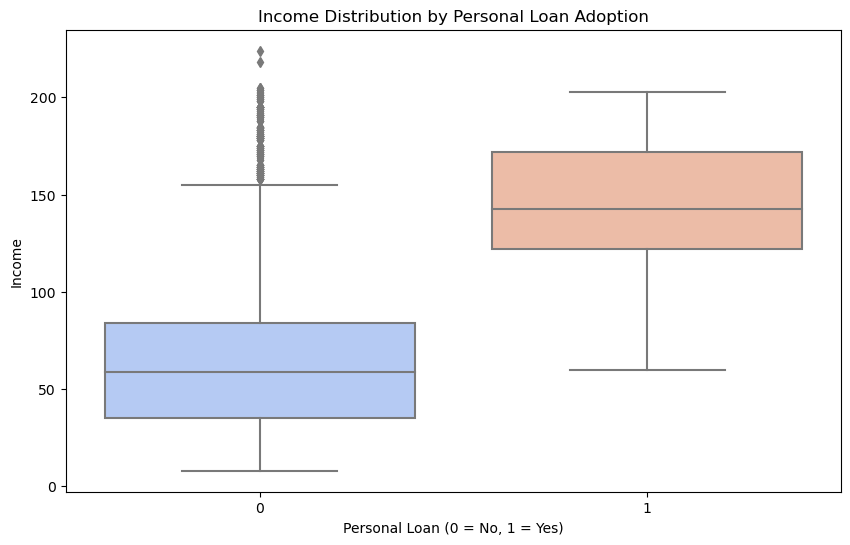

In [19]:
# Personal Loan Adoption by Income
plt.figure(figsize=(10, 6))
sns.boxplot(data=bank_df, x='Personal Loan', y='Income', palette='coolwarm')
plt.title('Income Distribution by Personal Loan Adoption')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()

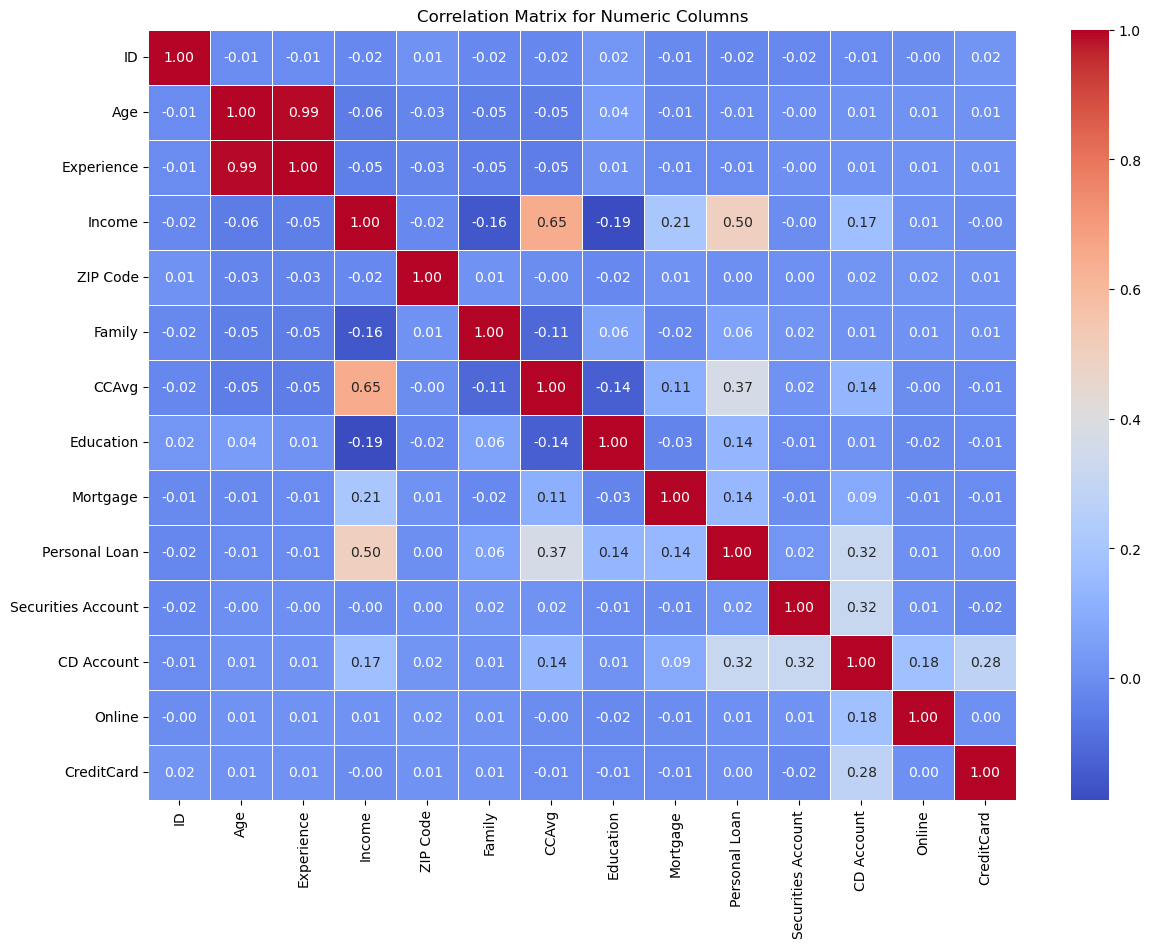

In [20]:
# Selecting only numeric columns for correlation
numeric_columns = bank_df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix for numeric columns only
correlation_matrix = bank_df[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()



## Strong Positive Correlations:

### Age and Experience (0.994): This shows that Age and Experience are almost perfectly correlated, which is expected because higher age usually corresponds to more experience.
### Income and CCAvg (0.646): Higher income is strongly associated with a higher average credit card spending.
### Personal Loan and Income (0.502): Higher income is positively correlated with obtaining a personal loan, indicating that individuals with higher income may be more likely to get loans.
### CD Account and Securities Account (0.317): A moderate correlation suggests that individuals with Certificates of Deposit (CD) accounts might also have securities accounts.
### CD Account and Personal Loan (0.316): A moderate correlation between having a CD account and taking a personal loan.

## Strong Negative Correlations:

### Income and Education (-0.188): Indicates a weak-to-moderate inverse relationship; this could suggest that higher education does not always correlate with higher immediate income in this dataset.

## Weak or Negligible Correlations:

### ZIP Code and other variables: ZIP Code shows almost no correlation with most variables, as expected since it does not directly relate to behavioral or financial traits.
### Online and other variables: Online banking usage shows negligible correlation with most variables, suggesting that its usage is not strongly tied to demographics or financial attributes in this dataset.


## Data Preparation

In [23]:
bank_df = bank_df.drop(columns=["ID","ZIP Code","Education Label"])


### Dropping the non-significant columns ("ID" and "ZIP Code","education label(which was only created for visualizatrion purpose")

In [24]:
# Defining the features (X) and target variable (y)
X = bank_df.drop(columns=["Personal Loan"])  # "Personal Loan" is the target variable
y = bank_df["Personal Loan"]

In [25]:
bank_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


# ANN

## Data Splitting
### Splitting the dataset into training (60%), validation (20%), and testing (20%) sets
### Training set: Helps the model learns patterns
### Validation set: Fine-tune hyperparameters
### Testing: Evaluate model performance on unseen data

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


## Data Normalization

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Model Architecture
### Input Layer: Accepts input features
### Hidden Layers: 3 layers with dropout for regularization
### Output Layer: Single neuron for binary classification (loan approval or rejection) hence using "sigmoid"

In [32]:
model = Sequential()

In [33]:
model.add(Input(shape=(X_train.shape[1],)))


In [34]:
# Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

In [35]:
# Output Layer
model.add(Dense(1, activation='sigmoid'))

## Model Compilation
### Loss Function: Binary Crossentropy for binary classification
### Optimizer: Adam for adaptive learning rate
### Metrics: Accuracy, Precision, Recall, F1-score

In [107]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', Precision(), Recall(), 'AUC'])


## Early Stopping
### Stops training if validation loss does not improve for 10 consecutive epochs
### Restores the best weights achieved during training
### Training the model with early stopping to prevent overfitting

In [39]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [41]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.6659 - loss: 0.5874 - val_accuracy: 0.9040 - val_loss: 0.2312
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.9057 - loss: 0.2666 - val_accuracy: 0.9220 - val_loss: 0.1696
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9243 - loss: 0.1941 - val_accuracy: 0.9540 - val_loss: 0.1413
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9382 - loss: 0.1671 - val_accuracy: 0.9580 - val_loss: 0.1201
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9444 - loss: 0.1583 - val_accuracy: 0.9640 - val_loss: 0.1084
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9511 - loss: 0.1526 - val_accuracy: 0.9670 - val_loss: 0.0951
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9619 - loss: 0.1141 - val_accuracy: 0.9660 - val_loss: 0.0901
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9651 - loss: 0.1036 - val_accuracy: 0.

## Validation Performance
### Evaluating the model on validation data

In [43]:
val_preds = (model.predict(X_val) > 0.5).astype('int32')
val_f1 = f1_score(y_val, val_preds)
val_precision = precision_score(y_val, val_preds)
val_recall = recall_score(y_val, val_preds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


In [44]:
print("\nValidation Metrics:")
print(f"F1-Score: {val_f1:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print("Classification Report (Validation):")
print(classification_report(y_val, val_preds))


Validation Metrics:
F1-Score: 0.8913
Precision: 0.9318
Recall: 0.8542
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       904
           1       0.93      0.85      0.89        96

    accuracy                           0.98      1000
   macro avg       0.96      0.92      0.94      1000
weighted avg       0.98      0.98      0.98      1000



## Test Performance
### Evaluating the model on test data

In [46]:
test_preds = (model.predict(X_test) > 0.5).astype('int32')
test_f1 = f1_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step


In [47]:
print("\nTest Metrics:")
print(f"F1-Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print("Classification Report (Test):")
print(classification_report(y_test, test_preds))


Test Metrics:
F1-Score: 0.9109
Precision: 0.8679
Recall: 0.9583
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       904
           1       0.87      0.96      0.91        96

    accuracy                           0.98      1000
   macro avg       0.93      0.97      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [91]:
# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[890  14]
 [  4  92]]


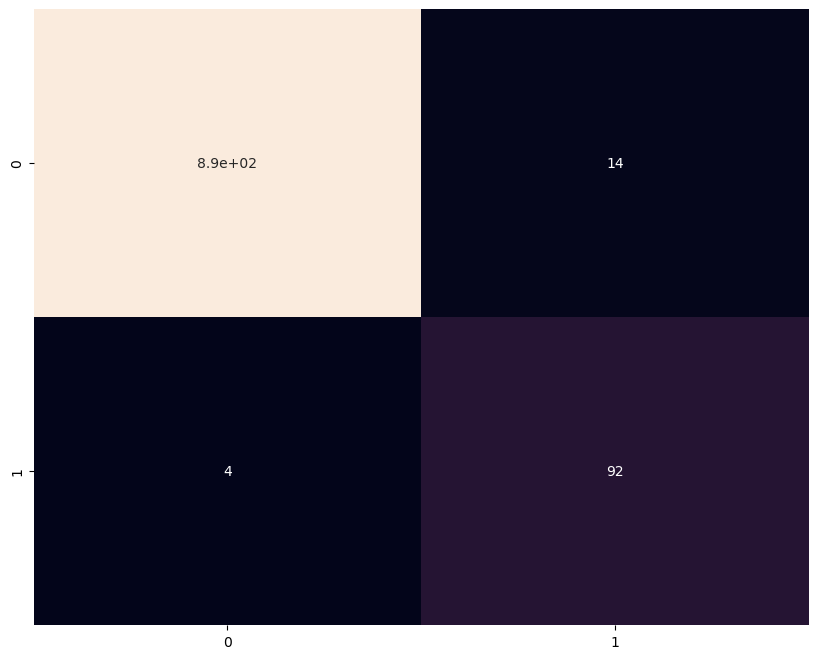

In [97]:
conf_mat = metrics.confusion_matrix(y_test, test_preds)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cbar=False)
plt.savefig('conf_matrix.png', facecolor='w', bbox_inches='tight')
plt.show()

# Plotting the Training and Validation Loss

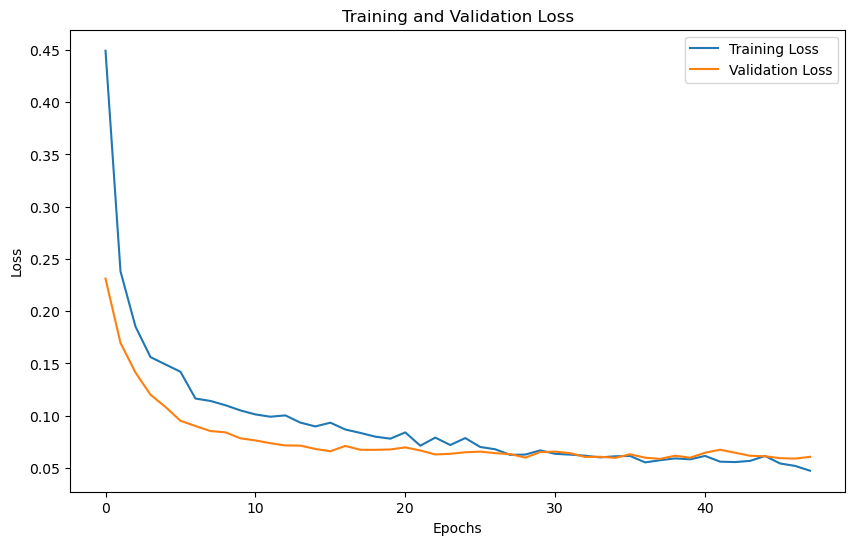

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
# ROC Curve and AUC Score
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step


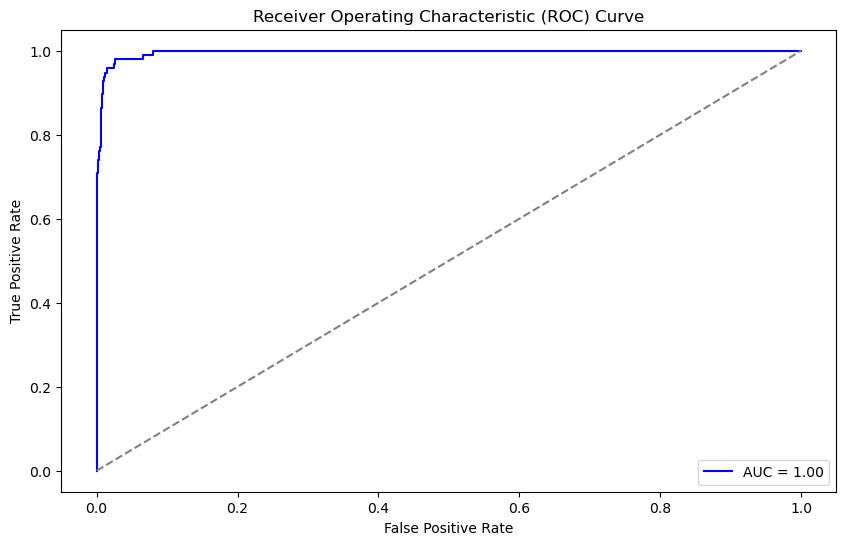

In [51]:
# Plotting ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
print(f"AUC Score: {roc_auc:.2f}")

AUC Score: 1.00
